# calculate betweenness centrality


In [2]:
import pandas as pd
import numpy as np
import csv
import ast
import matplotlib.pyplot as plt
import bct

In [198]:
gs_csv = "gs_outputs/gs_authorlist_updated1.csv"
scival_csv = "scival_outputs/sv_authorlist_publications_updated2.csv"

combined_df = pd.read_csv("authors_comparisons_updated2.csv")

In [199]:
gs_df = pd.read_csv(gs_csv)
scival_df = pd.read_csv(scival_csv)

In [200]:
def get_coauthor_matrix(df, name_str, coauthor_str):
    ''' 
    PARAMS:
    df: dataframe with at minimum columns containing author names and coauthor dictionary
    name_str: string of author column name in df
    coauthor_str: string of coauthor column name in df

    RETURN:
    coauthor_matrix: numpy array NxN with number of shared co-authored publications
    '''
    names = df.loc[:,name_str]
    coauthor_matrix = np.zeros((names.size, names.size))

    for idx, author in df.iterrows():
        auth_name = author[name_str]
        # row = names[names == auth_name].index[0]
        row = idx
        try:
            coauthors = ast.literal_eval(author[coauthor_str]) #get coauthors
            if len(coauthors) == 0: print(auth_name, "has no coauthors")
            for coauthor in coauthors.keys():
                num_publications = coauthors[coauthor]
                col = names[names == coauthor].index[0]
                coauthor_matrix[col][row] += num_publications

        except:
            print(auth_name, "has no coauthors")
    
    print("\n")
    return coauthor_matrix

In [201]:
scival_coauthor_matrix = get_coauthor_matrix(combined_df, "sv_name", "sv_coauthors")
# scival_coauthor_matrix = get_coauthor_matrix(scival_df, "Name", "Coauthors")
gs_coauthor_matrix = get_coauthor_matrix(combined_df, "gs_name", "gs_coauthors")

Annie Vogel Ciernia has no coauthors
Mark S. Cembrowski has no coauthors
Michael D. Gordon has no coauthors
Manu S. Madhav has no coauthors
Brian Fisher has no coauthors
Emily Lauren Sylwestrak has no coauthors
Anthony Randal McIntosh has no coauthors


Michael Gordon has no coauthors
Manu S Madhav has no coauthors
Emily Sylwestrak has no coauthors




In [202]:
# plt.matshow(scival_coauthor_matrix,cmap="Wistia",norm="linear")
# plt.matshow(gs_coauthor_matrix,cmap="Wistia",norm="linear")
def graph_matrix(df, title):
    coauthor_matrix = get_coauthor_matrix(df)
    names=scival_df["Name"].to_list()

    fig, ax = plt.subplots()
    im = ax.imshow(coauthor_matrix, cmap="YlOrRd")

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(names)), labels=names, fontsize="xx-small")
    ax.set_yticks(np.arange(len(names)), labels=names, fontsize="xx-small")

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(names)):
        for j in range(len(names)):
            text = ax.text(j, i, int(coauthor_matrix[i, j]),
                        ha="center", va="center", color="black")

    ax.set_title(title)
    fig.tight_layout()
    fig.set_size_inches(10, 10)
    plt.show()

In [203]:
scival_centrality = bct.betweenness_bin(scival_coauthor_matrix)
scival_centrality_normed = scival_centrality/(((len(scival_coauthor_matrix)-1)*(len(scival_coauthor_matrix)-2))/2)

([<matplotlib.axis.XTick at 0x29c8df86980>,
 [Text(0, 0, 'Timothy H. Murphy'),
  Text(1, 0, 'Annie Vogel Ciernia'),
  Text(2, 0, 'Brian A. MacVicar'),
  Text(3, 0, 'Fidel Vila-Rodriguez'),
  Text(4, 0, 'Shernaz X. Bamji'),
  Text(5, 0, 'Lara A. Boyd'),
  Text(6, 0, 'Paul Pavlidis'),
  Text(7, 0, 'Martin McKeown'),
  Text(8, 0, 'A. Jon Stoessl'),
  Text(9, 0, 'P. A. Cripton'),
  Text(10, 0, 'Jason S. Snyder'),
  Text(11, 0, 'Wolfram G. Tetzlaff'),
  Text(12, 0, 'Anthony G. Phillips'),
  Text(13, 0, 'Catharine A. Winstanley'),
  Text(14, 0, 'YuTian Wang'),
  Text(15, 0, 'Jeremy Keith Seamans'),
  Text(16, 0, 'Terrance P. Snutch'),
  Text(17, 0, 'Ian Mackenzie'),
  Text(18, 0, 'Lynn A. Raymond'),
  Text(19, 0, 'Kurt Haas'),
  Text(20, 0, 'Mark S. Cembrowski'),
  Text(21, 0, 'Fabio Rossi'),
  Text(22, 0, 'Angela Jane I. Roskams'),
  Text(23, 0, 'Catharine Rankin'),
  Text(24, 0, 'Michael D. Gordon'),
  Text(25, 0, 'Leonid Sigal'),
  Text(26, 0, 'Z. Jane Wang'),
  Text(27, 0, 'Peyman Servat

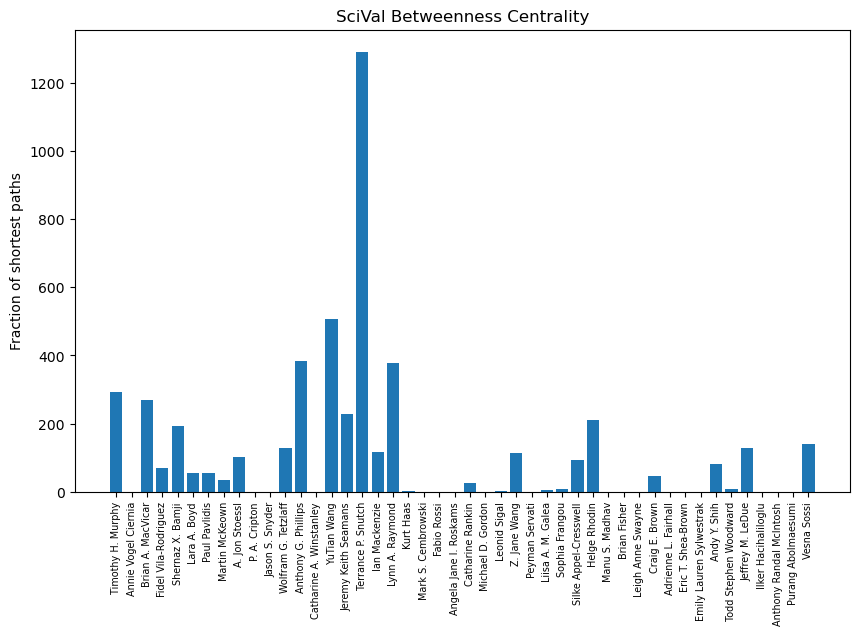

In [204]:
plt.figure(figsize=(10,6))
names = scival_df["Name"].to_list()
plt.bar(names, scival_centrality)
plt.title("SciVal Betweenness Centrality")
plt.ylabel("Fraction of shortest paths")
plt.xticks(range(len(names)), labels=names, rotation=90, fontsize='x-small')

In [205]:
gs_centrality = bct.betweenness_bin(gs_coauthor_matrix)
gs_centrality_normed = gs_centrality/(((len(gs_coauthor_matrix)-1)*(len(gs_coauthor_matrix)-2))/2)
gs_BC_adjusted = gs_centrality/np.array([data for data in combined_df["gs_count"]])

scival_centrality = bct.betweenness_bin(scival_coauthor_matrix)
scival_centrality_normed = scival_centrality/(((len(scival_coauthor_matrix)-1)*(len(scival_coauthor_matrix)-2))/2)
scival_BC_adjusted = scival_centrality/np.array([data for data in combined_df["sv_count"]])

In [206]:
print(scival_centrality)
print(scival_BC_adjusted)

[2.93613652e+02 0.00000000e+00 2.69567751e+02 6.83140332e+01
 1.94379586e+02 5.59043235e+01 5.52643302e+01 3.31975949e+01
 1.02926638e+02 0.00000000e+00 0.00000000e+00 1.27000000e+02
 3.85220730e+02 0.00000000e+00 5.07657809e+02 2.27484267e+02
 1.29119376e+03 1.15313183e+02 3.76742217e+02 2.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.56933524e+01
 0.00000000e+00 1.00000000e+00 1.12450558e+02 0.00000000e+00
 4.19511939e+00 7.18433871e+00 9.38833146e+01 2.09595347e+02
 0.00000000e+00 0.00000000e+00 5.90714240e-01 4.76751143e+01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.10000000e+01
 9.05120900e+00 1.28048002e+02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.38929632e+02]
[1.58710082 0.         1.61417815 0.42431076 4.41771785 0.25762361
 0.34977424 0.12768306 0.33746439 0.         0.         0.61650485
 1.25479065 0.         2.64405109 3.24977524 6.20766231 0.408912
 2.46236743 0.03636364 0.         0.         0.         0.23147164
 0.         0.0078125  0.334674

([<matplotlib.axis.XTick at 0x29c922ce920>,
 [Text(0, 0, 'Timothy H. Murphy'),
  Text(1, 0, 'Annie Vogel Ciernia'),
  Text(2, 0, 'Brian A. MacVicar'),
  Text(3, 0, 'Fidel Vila-Rodriguez'),
  Text(4, 0, 'Shernaz X. Bamji'),
  Text(5, 0, 'Lara A. Boyd'),
  Text(6, 0, 'Paul Pavlidis'),
  Text(7, 0, 'Martin McKeown'),
  Text(8, 0, 'A. Jon Stoessl'),
  Text(9, 0, 'P. A. Cripton'),
  Text(10, 0, 'Jason S. Snyder'),
  Text(11, 0, 'Wolfram G. Tetzlaff'),
  Text(12, 0, 'Anthony G. Phillips'),
  Text(13, 0, 'Catharine A. Winstanley'),
  Text(14, 0, 'YuTian Wang'),
  Text(15, 0, 'Jeremy Keith Seamans'),
  Text(16, 0, 'Terrance P. Snutch'),
  Text(17, 0, 'Ian Mackenzie'),
  Text(18, 0, 'Lynn A. Raymond'),
  Text(19, 0, 'Kurt Haas'),
  Text(20, 0, 'Mark S. Cembrowski'),
  Text(21, 0, 'Fabio Rossi'),
  Text(22, 0, 'Angela Jane I. Roskams'),
  Text(23, 0, 'Catharine Rankin'),
  Text(24, 0, 'Michael D. Gordon'),
  Text(25, 0, 'Leonid Sigal'),
  Text(26, 0, 'Z. Jane Wang'),
  Text(27, 0, 'Peyman Servat

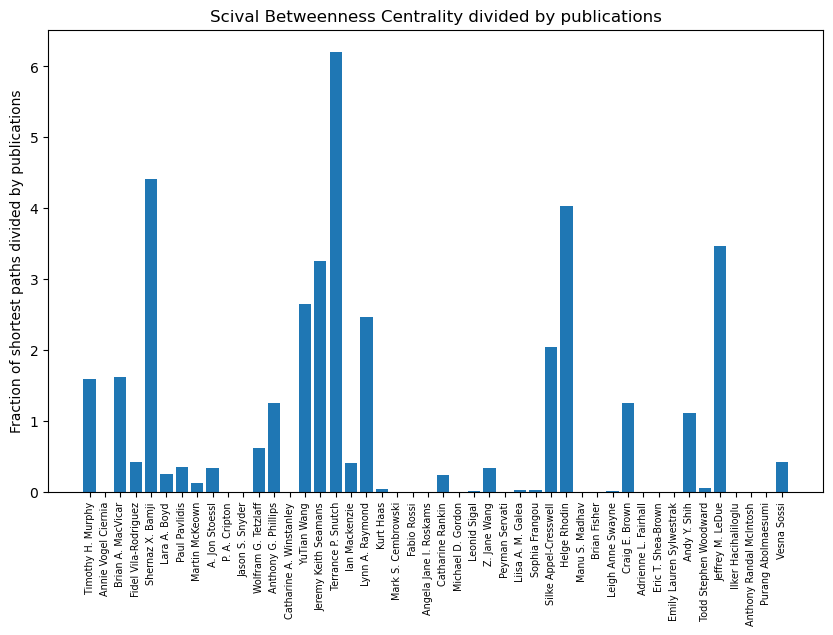

In [207]:
plt.figure(figsize=(10,6))
gs_names = gs_df["Name"].to_list()
plt.bar(names, scival_BC_adjusted)
plt.title("Scival Betweenness Centrality divided by publications")
plt.ylabel("Fraction of shortest paths divided by publications")
plt.xticks(range(len(gs_names)), labels=names, rotation=90, fontsize='x-small')

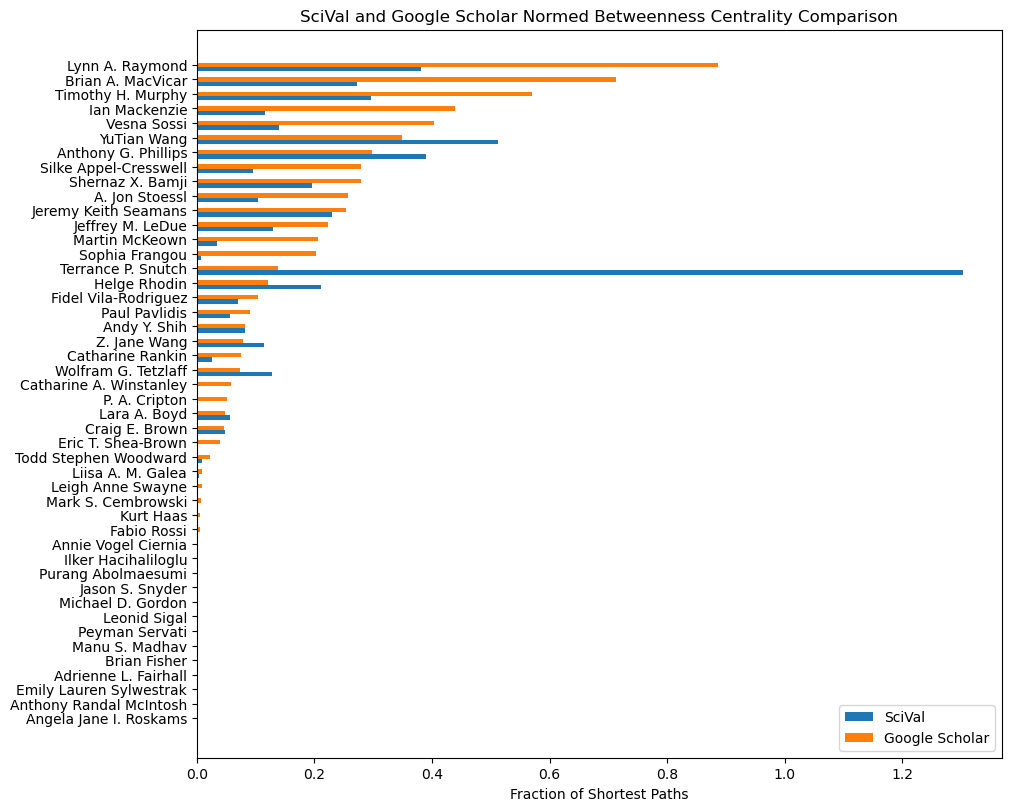

In [208]:
centrality_df = pd.DataFrame({
    "Name":names,
    "SciVal":scival_centrality_normed,
    "Google Scholar":gs_centrality_normed,
})

ordered_df = centrality_df.sort_values(by="Google Scholar", ascending=True)

species = ordered_df["Name"].to_list()
penguin_means = {
    'SciVal': ordered_df["SciVal"].to_list(),
    'Google Scholar': ordered_df["Google Scholar"].to_list(),
}

x = np.arange(len(species))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

fig.set_size_inches(10, 8)
plt.title("Google Scholar Betweenness Centrality")

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    # if attribute=="Scival":
    #     ax.bar_label(rects, padding=3, color = "blue")
    # elif attribute=="Google Scholar":
    #     ax.bar_label(rects, padding=3, color = "orange")
    multiplier += 1

ax.set_xlabel("Fraction of Shortest Paths")
ax.set_title('SciVal and Google Scholar Normed Betweenness Centrality Comparison')
ax.set_yticks(x + width, labels=species)
ax.legend(loc='lower right')

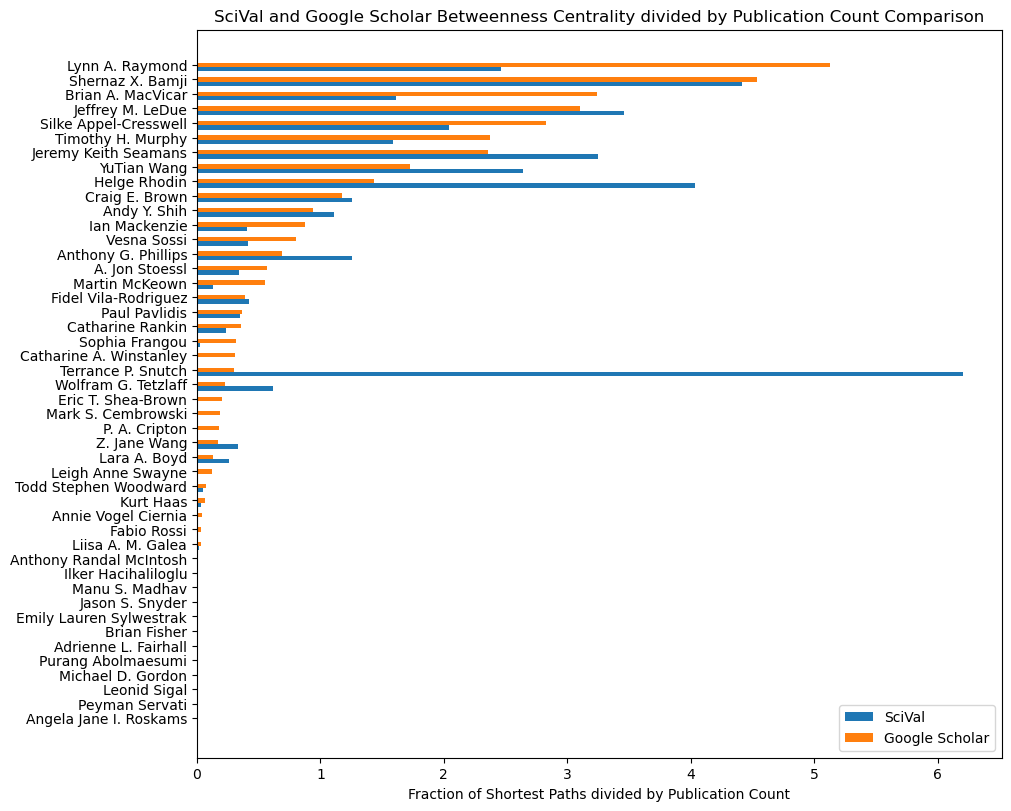

In [209]:
centrality_df_unadjusted = pd.DataFrame({
    "Name":names,
    "SciVal":scival_BC_adjusted,
    "Google Scholar":gs_BC_adjusted,
})

ordered_df_unadjusted = centrality_df_unadjusted.sort_values(by="Google Scholar", ascending=True)
# print(ordered_df_unadjusted.head)

species = ordered_df_unadjusted["Name"].to_list()
penguin_means = {
    'SciVal': ordered_df_unadjusted["SciVal"].to_list(),
    'Google Scholar': ordered_df_unadjusted["Google Scholar"].to_list(),
}

x = np.arange(len(species))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

fig.set_size_inches(10, 8)
plt.title("Google Scholar Betweenness Centrality")

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    # if attribute=="Scival":
    #     ax.bar_label(rects, padding=3, color = "blue")
    # elif attribute=="Google Scholar":
    #     ax.bar_label(rects, padding=3, color = "orange")
    multiplier += 1

ax.set_xlabel("Fraction of Shortest Paths divided by Publication Count")
ax.set_title('SciVal and Google Scholar Betweenness Centrality divided by Publication Count Comparison')
ax.set_yticks(x + width, labels=species)
ax.legend(loc='lower right')

<bound method NDFrame.head of                        Name  SciVal  Google Scholar
38  Emily Lauren Sylwestrak     0.0             0.0
32           Manu S. Madhav     0.0             0.0
24        Michael D. Gordon     0.0             0.0
22   Angela Jane I. Roskams     1.0             1.0
39             Andy Y. Shih     1.0             1.0
36     Adrienne L. Fairhall     1.0             1.0
33             Brian Fisher     0.0             1.0
25             Leonid Sigal     1.0             1.0
44       Purang Abolmaesumi     1.0             1.0
10          Jason S. Snyder     1.0             1.0
42      Ilker Hacihaliloglu     1.0             1.0
1       Annie Vogel Ciernia     0.0             1.0
43  Anthony Randal McIntosh     0.0             1.0
21              Fabio Rossi     1.0             2.0
37       Eric T. Shea-Brown     1.0             2.0
35           Craig E. Brown     2.0             2.0
34        Leigh Anne Swayne     2.0             2.0
27           Peyman Servati     2.

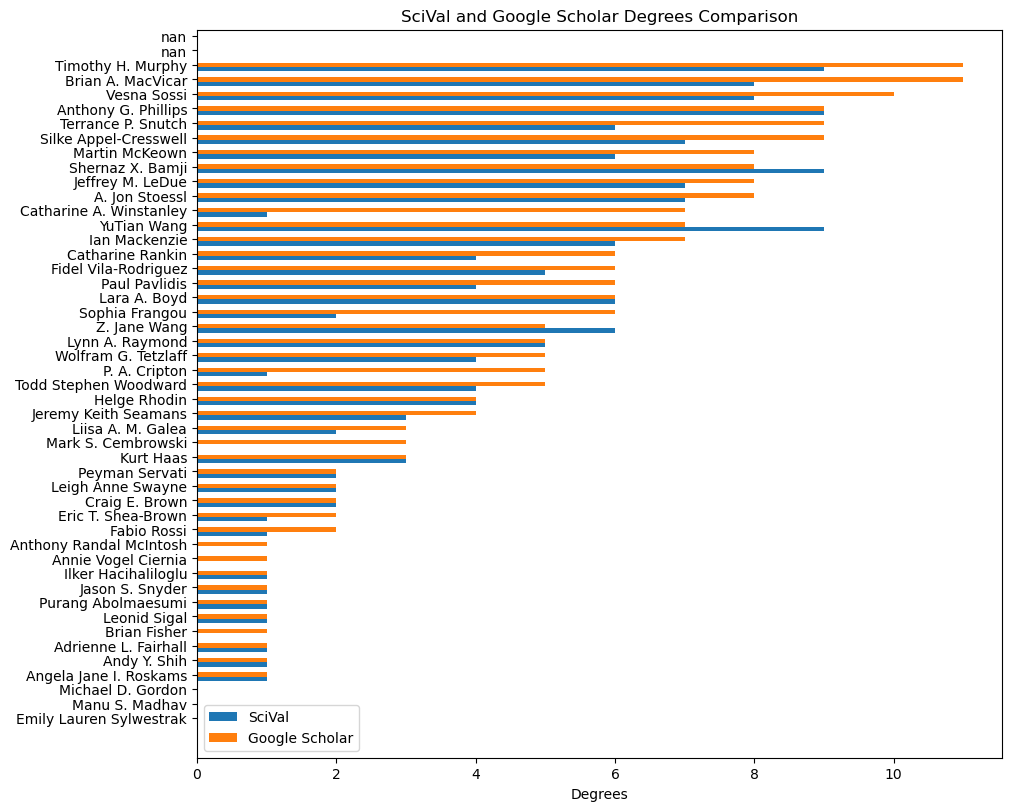

In [43]:
combined_df = pd.read_csv("authors_comparisons_updated2.csv")

degree_df = pd.DataFrame({
    "Name":combined_df["sv_name"].to_list(),
    "SciVal":combined_df["sv_degree"].to_list(),
    "Google Scholar":combined_df["gs_degree"].to_list(),
})

ordered_df = degree_df.sort_values(by="Google Scholar", ascending=True)
print(ordered_df.head)

species = ordered_df["Name"].to_list()
penguin_means = {
    'SciVal': ordered_df["SciVal"].to_list(),
    'Google Scholar': ordered_df["Google Scholar"].to_list(),
}

x = np.arange(len(species))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

fig.set_size_inches(10, 8)
plt.title("Google Scholar Degrees")

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    # if attribute=="Scival":
    #     ax.bar_label(rects, padding=3, color = "blue")
    # elif attribute=="Google Scholar":
    #     ax.bar_label(rects, padding=3, color = "orange")
    multiplier += 1

ax.set_xlabel("Degrees")
ax.set_title('SciVal and Google Scholar Degrees Comparison')
ax.set_yticks(x + width, labels=species)
ax.legend()